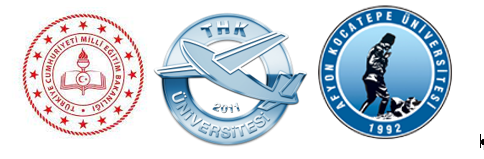

In [3]:
#Import library
from IPython.display import Image
Image(filename = "imgs/katilimcilar.png", width = 300)

- Kaynak: Derin Öğrenmeye Dalış - Aston Zhang, Zachary C. Lipton, Mu Li, and Alexander J. Smola

# Modern Evrişimsel Sinir Ağları

* Derin sinir ağları fikri oldukça basit olsa da (bir grup katmanı bir araya getirin), performans mimariler ve hiperparametre seçenekleri bağlı olarak aşırı farklılık gösterebilir. 
- Bu bölümde açıklanan sinir ağları sezginin, birkaç matematiksel içgörünün ve bir sürü deneme yanılmanın ürünüdür. 
- Bu modelleri tarihsel sırayla sunuyoruz, kısmen de tarih duygusunu aktarmak için, böylece alanın nereye gittiği ile ilgili kendi sezgilerinizi oluşturabilir ve belki de kendi mimarilerinizi geliştirebilirsiniz.

## AlexNet

- Alex Krizhevsky, Ilya Sutskever ve Geoff Hinton, yeni bir CNN biçimi önerdi. AlexNet ve 2012 ImageNet yarışmasında mükemmel performans elde etti. AlexNet, (Krizhevsky et al., 2012)ʼün atılım yapan ImageNet sınıflandırma makalesinin ilk yazarı olan Alex Krizhevskyʼnin adını aldı.
- 8 katmanlı CNN kullanan AlexNet, 2012 ImageNet Büyük Ölçekli Görsel Tanıma Yarışmasıʼnı olağanüstü derecede büyük bir farkla kazandı. Bu ağ, ilk kez, öğrenme yoluyla elde edilen özniteliklerin el ile tasarlanmış öznitelikleri aşabildiğini ve bilgisayarla görmede önceki alışılmış kalıpları kırabileceğini gösterdi.

![](cnn/1.png)

- AlexNet ve LeNetʼin tasarım felsefeleri çok benzer, ancak önemli farklılıklar da vardır. 
- İlk olarak, AlexNet nispeten küçük LeNet5ʼten çok daha derindir. 
- AlexNet sekiz katmandan oluşur: Beş evrişimli katman, iki tam bağlı gizli katman ve bir tam bağlı çıktı katmanı. İkincisi, AlexNet etkinleştirme fonksiyonu olarak sigmoid yerine ReLUʼyu kullandı
- AlexNetʼin ilk katmanında, evrişim penceresinin şekli 11×11ʼdir. 
- ImageNetʼteki çoğu imge MNIST imgelerinden on kat daha yüksek ve daha geniş olduğundan, ImageNet verilerindeki nesneler daha fazla piksel kaplama eğilimindedir. 
- Sonuç olarak, nesneyi anlamak için daha büyük bir evrişim penceresi gereklidir. İkinci kattaki evrişim pencere şekli 5 × 5ʼya, ardından 3 × 3ʼe indirgenir. Buna ek olarak, birinci, ikinci ve beşinci kıvrımsal katmanlardan sonra, ağ 3 × 3 pencere şekli ve 2ʼlik bir uzun adım ile maksimum ortaklama katmanları ekler. 
- Ayrıca, AlexNetʼin LeNetʼten on kat daha fazla evrişim kanalı vardır.
- Son evrişimli tabakadan sonra 4096 çıktılı iki tam bağlı katman vardır. Bu iki büyük tam bağlı katman, yaklaşık 1 GBʼlık model parametresi üretir. 
- Ayrıca, AlexNet sigmoid etkinleştirme işlevini daha basit bir ReLU etkinleştirme fonksiyonu ile değiştirdi. Bir yandan, ReLU etkinleştirme işlevinin hesaplanması daha kolaydır. Örneğin, sigmoid etkinleştirme işlevinde bulunan üst alma işlemi yoktur. - - Öte yandan, ReLU etkinleştirme işlevi, farklı parametre ilkleme yöntemleri kullanıldığında model eğitimini kolaylaştırır. Bunun nedeni, sigmoid etkinleştirme işlevinin çıktısı 0 veya 1ʼe çok yakın olduğunda, bu bölgelerin gradyanının neredeyse 0 olmasıdır, böylece geri yayma model parametrelerinin bazılarını güncelleştirmeye devam edemez. 
- Buna karşılık, pozitif aralıktaki ReLU etkinleştirme işlevinin gradyanı her zaman 1ʼdir. Bu nedenle, model parametreleri düzgün ilklenmezse, sigmoid işlevi pozitif aralıkta neredeyse 0 gradyan elde edebilir, böylece model etkili bir şekilde eğitilemez.
- AlexNet, tam bağlı katmanın model karmaşıklığını hattan düşürme (dropout) ile kontrol ederken, LeNet sadece ağırlık sönümlemesini kullanır. Verileri daha da zenginleştirme için AlexNetʼin eğitim döngüsü, ters çevirme, kırpma ve renk değişiklikleri gibi çok fazla imge zenginleştirme ekledi. Bu, modeli daha gürbüz hale getirir ve daha büyük örneklem boyutu aşırı öğrenmeyi etkili bir şekilde azaltır.

## VGG

- Sinir ağı mimarilerinin tasarımı, araştırmacıların bireysel nöron tabanlı düşünmekten tam katmanlara ve şimdi de katmanların kalıplarını tekrarlayan bloklara geçerek daha soyut bir hale gelmişti.
- Blokları kullanma fikri ilk olarak Oxford Üniversitesiʼndeki Görsel Geometri Grubu93ʼnun (Visual Geometry Group - VGG), kendi adını taşıyan VGG ağında ortaya çıkmıştır. 
- Klasik CNNʼlerin temel yapı taşı aşağıdakilerin bir dizisidir: 
     - (i) Çözünürlüğü korumak için dolgulu bir evrişimli katman, 
     - (ii) ReLU gibi bir doğrusal olmayan işlev, 
     - (iii) Maksimum ortaklama katmanı gibi bir ortaklama katmanı. 
- Bir VGG bloğu, uzamsal altörnekleme için bir maksimum ortaklama katmanı izleyen bir evrişimli katman dizisinden oluşur. Orijinal VGG makalesinde (Simonyan & Zisserman, 2014), yazarlar 3 × 3 çekirdeklerle evrişim (yüksekliği ve genişliği aynı tutarak) ve 2 birim uzun adımlı 2 × 2 maksimum ortaklama (her bloktan sonra çözünürlüğü yarıya indirerek) kullandılar. 

![](cnn/2.png)

- VGG ağının tam bağlı kısmı AlexNetʼte kapsananla aynıdır.
- Orijinal VGG ağında, ilk ikisinin her birinin bir evrişimli tabakaya sahip olduğu ve sonraki üçünün her birinin iki evrişimli katman içerdiği 5 evrişimli blok vardı. 
- conv_arch = ((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))
- İlk blokta 64 çıktı kanalı vardır ve sonraki her blok, bu sayı 512ʼye ulaşıncaya kadar çıktı kanalı sayısını iki katına çıkarır. Bu ağ 8 evrişimli katman ve 3 tam bağlı katman kullandığından, genellikle VGG-11 olarak adlandırılır.
- Simonyan ve Ziserman, VGG makalelerinde çeşitli mimarilerle deneyler yaptılar. Özellikle, derin ve dar evrişimlerin (yani 3 × 3) birkaç katmanının daha az sayıda geniş evrişimli katmandan daha etkili olduğunu buldular.


In [ ]:
def vgg_block(num_convs, in_channels, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)) #(3x3)
        layers.append(nn.ReLU())
        in_channels = out_channels
    layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
    return nn.Sequential(*layers)


## Network In Network

- Giriş matrisi 100 kanallıysa ve buna 30 kanallı bir 1x1 evrişim filtresi hacimsel olarak uygulandığında çıkış matrisinin kanal sayısı filtre sayısına eşit, yani 30 olur. O zaman 1x1 evrişim katmanı derinlikte boyut azaltmak demektir.

![](cnn/12.png)

- LeNet, AlexNet ve VGG ortak bir tasarım deseni paylaşır: Öznitelikleri bir dizi evrişim ve ortaklama katmanları aracılığıyla mekansal yapıdan faydalanarak çıkar ve daha sonra tam bağlı katmanlar aracılığıyla temsilleri sonradan işle. 
-  Yoğun katmanların dikkatsiz kullanımı, temsilin mekansal yapısını tamamen görmezden gelebilir; ağ içindeki ağ (NiN) blokları burada bir alternatif sunuyor. Çok basit bir anlayışa dayalı olarak önerildiler: Her piksel için kanallarda ayrı ayrı bir MLP kullanmak (Lin et al., 2013).
- Evrişimli katmanların girdi ve çıktılarının, örneğe, kanala, yüksekliğe ve genişliğe karşılık gelen eksenlere sahip dört boyutlu tensörlerden oluştuğunu hatırlayın. 
- Ayrıca, tam bağlı katmanların girdi ve çıktılarının tipik olarak örneğe ve özniteliğe karşılık gelen iki boyutlu tensörler olduğunu hatırlayın. 
- NiNʼin arkasındaki fikir, her piksel konumuna (her yükseklik ve genişlik için) tam bağlı bir katman uygulamaktır. Ağırlıkları her mekansal konum boyunca bağlarsak, bunu bir 1×1 evrişimli katman  veya her piksel konumunda bağımsız olarak hareket eden tam bağlı bir katman olarak düşünebiliriz. 
- Bunu görmenin bir başka yolu da mekansal boyuttaki her elemanın (yükseklik ve genişlik) bir örneğe eşdeğer ve bir kanalın bir özniteliğe eşdeğer olduğunu düşünmektir.
- NiN bloğu, bir evrişimli katmandan ve ardından ReLU etkinleştirmeleri ile piksel başına tam bağlı katmanlar olarak hareket eden iki 1 × 1 evrişimli katmandan oluşur. 
- İlk katmanın evrişim penceresi şekli genellikle kullanıcı tarafından ayarlanır. Sonraki pencere şekilleri 1 × 1ʼe sabitlenir.

![](cnn/3.png)

- NiN ve AlexNet arasındaki önemli bir fark, NiNʼin tam bağlı katmanlardan kaçınmasıdır. 
- Bunun yerine NiN, etiket sınıflarının sayısına eşit sayıda çıktı kanalı içeren bir NiN bloğu kullanır ve onun ardından gelen global ortalama ortaklama katmanı ile bir logit vektörü oluşturur. 
- NiNʼin tasarımının bir avantajı, gerekli model parametrelerinin sayısını önemli ölçüde azaltmasıdır. Bununla birlikte, pratikte, bu tasarım bazen artan model eğitim süresi gerektirir.


In [ ]:
def nin_block(in_channels, out_channels, kernel_size, strides, padding):
    return nn.Sequential(
                    nn.Conv2d(in_channels, out_channels, kernel_size, strides, padding), #11
                    nn.ReLU(),
                    nn.Conv2d(out_channels, out_channels, kernel_size=1), nn.ReLU(),
                    nn.Conv2d(out_channels, out_channels, kernel_size=1), nn.ReLU())
#########################################################################################
net = nn.Sequential(
                    nin_block(1, 96, kernel_size=11, strides=4, padding=0),
                    nn.MaxPool2d(3, stride=2),
                    nin_block(96, 256, kernel_size=5, strides=1, padding=2),
                    nn.MaxPool2d(3, stride=2),
                    nin_block(256, 384, kernel_size=3, strides=1, padding=1),
                    nn.MaxPool2d(3, stride=2),
                    nn.Dropout(0.5),
                    nin_block(384, 10, kernel_size=3, strides=1, padding=1),
                    nn.AdaptiveAvgPool2d((1, 1)),
                    nn.Flatten())


- Tam bağlı katmanların çıkarılması aşırı öğrenmeyi azaltır. NiN önemli ölçüde daha az parametreye sahiptir.
- NiN, tam bağlı katmanları kaldırır ve onları kanal sayısını istenen çıktı sayısına indirdikten sonra küresel ortalama ortaklama ile yer değiştirir (yani, tüm konumlar üzerinden toplar).
- NiN tasarımı, müteakip birçok CNN tasarımını etkiledi.


## GoogleNet

- 2014ʼte, GoogLeNet ImageNet Yarışmasıʼnı kazandı ve NiNʼin güçlü yanlarını ve (Szegedy et al., 2015)ʼün tekrarlanan bloklarının faydalarını birleştiren bir yapı önerdi. 
- Makalenin odak noktası, hangi büyüklükteki evrişim çekirdeklerinin en iyi olduğu sorusunu ele almaktı. Sonuçta, önceki popüler ağlar 1×1 gibi küçük ve 11×11 kadar büyük seçimler kullandı. 
- Bu makaledeki bir öngörü, bazen çeşitli boyutlarda çekirdeklerin bir kombinasyonunu kullanmanın avantajlı olabileceğiydi.

#### Inception
- GoogLeNetʼteki temel evrişimli bloğa, başlangıç bloğu denir.

![](cnn/4.png)

- Başlangıç bloğu dört paralel yoldan oluşur. 
- İlk üç yol, farklı uzamsal boyutlardan bilgi ayıklamak için 1×1, 3×3 ve 5×5 pencere boyutlarına sahip evrişimli katmanlar kullanır. 
- Orta iki yol, kanalların sayısını azaltmak ve modelin karmaşıklığını azaltmak için girdi üzerinde bir 1 × 1 evrişim gerçekleştirir. 
- Dördüncü yol, 3 × 3 maksimum ortaklama katmanı kullanır ve onu ardından kanal sayısını değiştiren 1×1 evrişimli katman izler. Dört yol, girdi ve çıktıya aynı yüksekliği ve genişliği vermek için uygun dolguyu kullanır. 
- Son olarak, her yol boyunca çıktılar kanal boyutu boyunca bitiştirilir ve bloğun çıktısını oluşturur. 
- Başlangıç bloğunun yaygın olarak ayarlanan hiper parametreleri, katman başına çıktı kanallarının sayısıdır.

In [ ]:
class Inception(nn.Module):
    def __init__(self, in_channels, c1, c2, c3, c4, **kwargs):
        super(Inception, self).__init__(**kwargs)
        # Path 1 is a single 1 x 1 convolutional layer
        self.p1_1 = nn.Conv2d(in_channels, c1, kernel_size=1)
        # Path 2 is a 1 x 1 convolutional layer followed by a 3 x 3
        # convolutional layer
        self.p2_1 = nn.Conv2d(in_channels, c2[0], kernel_size=1)
        self.p2_2 = nn.Conv2d(c2[0], c2[1], kernel_size=3, padding=1)
        # Path 3 is a 1 x 1 convolutional layer followed by a 5 x 5
        # convolutional layer
        self.p3_1 = nn.Conv2d(in_channels, c3[0], kernel_size=1)
        self.p3_2 = nn.Conv2d(c3[0], c3[1], kernel_size=5, padding=2)
        # Path 4 is a 3 x 3 maximum pooling layer followed by a 1 x 1
        # convolutional layer
        self.p4_1 = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        self.p4_2 = nn.Conv2d(in_channels, c4, kernel_size=1)

def forward(self, x):
    p1 = F.relu(self.p1_1(x))
    p2 = F.relu(self.p2_2(F.relu(self.p2_1(x))))
    p3 = F.relu(self.p3_2(F.relu(self.p3_1(x))))
    p4 = F.relu(self.p4_2(self.p4_1(x)))
    # Concatenate the outputs on the channel dimension
    return torch.cat((p1, p2, p3, p4), dim=1)
##############################################################################
b1 = nn.Sequential(nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

b2 = nn.Sequential(nn.Conv2d(64, 64, kernel_size=1),
    nn.ReLU(),
    nn.Conv2d(64, 192, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

b3 = nn.Sequential(Inception(192, 64, (96, 128), (16, 32), 32),
    Inception(256, 128, (128, 192), (32, 96), 64),
    nn.MaxPool2d(kernel_size=3, stride=2, padding=1))
b4 = nn.Sequential(Inception(480, 192, (96, 208), (16, 48), 64),
    Inception(512, 160, (112, 224), (24, 64), 64),
    Inception(512, 128, (128, 256), (24, 64), 64),
    Inception(512, 112, (144, 288), (32, 64), 64),
    Inception(528, 256, (160, 320), (32, 128), 128),
    nn.MaxPool2d(kernel_size=3, stride=2, padding=1))
b5 = nn.Sequential(Inception(832, 256, (160, 320), (32, 128), 128),
    Inception(832, 384, (192, 384), (48, 128), 128),
    nn.AdaptiveAvgPool2d((1,1)),
    nn.Flatten())

net = nn.Sequential(b1, b2, b3, b4, b5, nn.Linear(1024, 10))


- Bu ağın neden bu kadar iyi çalıştığına dair sezgi kazanmak için filtrelerin kombinasyonunu göz önünde bulundurun. 
- İmgeyi çeşitli filtre boyutlarında tarıyorlar. Bu, farklı boyutlardaki ayrıntıların farklı boyutlardaki filtrelerle verimli bir şekilde tanınabileceği anlamına gelir. 
- Aynı zamanda, farklı filtreler için farklı miktarlarda parametre tahsis edebiliriz.

![](cnn/5.png)


- Başlangıç bloğunda atanan kanal sayısının oranı, ImageNet veri kümesi üzerinde çok sayıda deney yoluyla elde edilmiştir.

## Batch Normalization

- Derin sinir ağlarını eğitmek zordur. Üstelik makul bir süre içinde yakınsamalarını sağlamak çetrefilli olabilir. Bu bölümde, derin ağların (Ioffe & Szegedy, 2015) yakınsamasını sürekli olarak hızlandıran popüler ve etkili bir teknik olan toplu normalleştirme
- Model eğitimi sırasında, toplu normalleştirme, minigrubun ortalama ve standart sapmasını kullanarak sinir ağının ara çıktısını sürekli olarak ayarlar, böylece sinir ağı boyunca her katmandaki ara çıktının değerleri daha kararlı olur.
- Tam bağlı katmanlar ve evrişimli katmanlar için toplu normalleştirme yöntemleri biraz farklıdır.
- Dropout gibi, toplu normalleştirme katmanları da eğitim modunda ve tahmin modunda farklı hesaplama sonuçlarına sahiptir.
- Toplu normalleştirmenin, öncelikle düzenlileştirme olmak üzere birçok yararlı yan etkisi vardır. 
- Öte yandan, orijinal motivasyondaki dahili eşdeğişken kaymasını azaltma geçerli bir açıklama gibi görünmüyor.
- Covariate Shift= Eğitim sırasında her katman hatasını düzeltmeye çalışır. Ancak, katmanlar ayrı ayrı hareket eder. Örneğin 2.katmanın çıktısı ile 3.katman beslenir. Bir katmandaki parametre değişikliği sonraki katmanlarda da değişime yol açar. Giriş katmanlarındaki bu kaymalar hasebiyle hesaplamalar için zaman gittikçe artar. ( 3.katman’daki öğrenmeye başlamak için 2.katmanın öğrenmesinin bitmesi gerekiyor çünkü )

![](cnn/6.png)

## ResNet

![](cnn/7.png)

- Daha büyük fonksiyon sınıfları daha küçük olanları içeriyorsa, onları artırmanın ağın açıklayıcı gücünü kesinlikle arttırdığını garanti ederiz. 
- Derin sinir ağları için, yeni eklenen katmanı bir birim fonksiyonu f(x) = x olarak eğitebilirsek, yeni model orijinal model kadar etkili olacaktır. 
- Yeni model, eğitim veri kümesine uyacak şekilde daha iyi bir çözüm elde edebileceğinden, eklenen katman eğitim hatalarını azaltmayı kolaylaştırabilir.
- Her ek katmanın kendi elemanlarından biri olarak birim işlevini daha kolaylıkla içermesi gerektiği fikri vardır. Bu fikirler oldukça derindi, fakat şaşırtıcı derecede basit bir çözüme ulaştılar; artık blok. 
- ResNet, 2015 yılında ImageNet Büyük Ölçekli Görsel Tanıma Yarışmasını kazandı. Tasarımın derin sinir ağlarının nasıl kurulacağı üzerinde derin bir etkisi oldu.
- Girdiyi x ile belirtin. Öğrenerek elde etmek istediğimiz altta yatan eşlemenin üstteki etkinleştirme işlevine girdi olarak kullanılacak f(x) olduğunu varsayıyoruz. 
- Kesik çizgili kutudaki kısım doğrudan f(x) eşlemesini öğrenmelidir. Sağda, kesik çizgili kutudaki bölümün, artık bloğun adını belirleyen artık eşleme f(x) − xʼi öğrenmesi gerekir. 
- Birim eşlemesi f(x) = x istenen altta yatan eşleme ise, artık eşlemeyi öğrenmek daha kolaydır: Sadece kesik çizgili kutudaki üst ağırlık katmanının ağırlıklarını ve ek girdilerini sıfıra itmemiz gerekir. 
-  O an ki ağırlık 0 olsa bile öğrenme hatasını optimize eder. Daha hızlı eğitilir.
- Sağdaki Şekil ResNetʼin artık bloğunu göstermektedir; burada x katman girdisini toplama işlemine taşıyan düz çizgiye artık bağlantı (veya kısayol bağlantısı) denir. Artık bloklarla girdiler, katmanlar arasında kalan bağlantılar üzerinden daha hızlı yayılabilir.

![](cnn/8.png)

- ResNet, VGGʼnin 3×3 evrişimli katman tam tasarımını izler. 
- Artık blok, aynı sayıda çıktı kanalına sahip iki 3 × 3 evrişimli katmana sahiptir. Her bir evrişimli katmanı, bir toplu normalleştirme katmanı ve bir ReLU etkinleştirme işlevi izler. 
- Ardından, bu iki evrişim işlemini atlayıp girdiyi doğrudan son ReLU etkinleştirme işlevinden önce ekleriz. 
- Bu tür bir tasarım, iki evrişimli katmanın çıktısının girdiyle aynı şekle sahip olmasını gerektirir, ancak böylece birlikte toplanabilirler. 
- Kanal sayısını değiştirmek istiyorsak, girdiyi toplama işlemi için istenen şekle dönüştürürken ek bir 1 × 1 evrişimli katman koymamız gerekir.

In [ ]:
class Residual(nn.Module): #@save
    """The Residual block of ResNet."""
    def __init__(self, input_channels, num_channels, use_1x1conv=False, strides=1):
        #super().__init__()
        self.conv1 = nn.Conv2d(input_channels, num_channels, kernel_size=3, padding=1, stride=strides)
        self.conv2 = nn.Conv2d(num_channels, num_channels, kernel_size=3, padding=1)
        if use_1x1conv:
            self.conv3 = nn.Conv2d(input_channels, num_channels, kernel_size=1, stride=strides)
        else:
            self.conv3 = None
        self.bn1 = nn.BatchNorm2d(num_channels)
        self.bn2 = nn.BatchNorm2d(num_channels)
    
    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))

![](cnn/9.png)

- Bu kod iki tür ağ oluşturur: 
    - use_1x1conv=Falseʼte ReLU doğrusal olmayanlığını uygulamadan önce çıktı ile girdiyi topladığımız ve diğeri toplamadan önce 1 × 1 evrişim vasıtasıyla kanalları ve çözünürlüğü ayarladığımız. 
    - Ayrıca çıktı kanallarının sayısını artırırken çıktı yüksekliğini ve genişliğini yarıya indirme seçeneğine de sahibiz.

- ResNetʼin ilk iki katmanı, daha önce tarif ettiğimiz GoogLeNetʼinkiyle aynıdır: 64 çıktı kanallı ve 2ʼlik bir uzun adımlı 7×7 evrişimli katmanını 2ʼlik bir uzun adımlı 3×3 maksimum ortaklama katmanı takip eder. Fark, ResNetʼteki her evrişimli katmandan sonra eklenen toplu normalleştirme katmanıdır.
- GoogLeNet, başlangıç bloklarından oluşan dört modül kullanır. 
- ResNet, her biri aynı sayıda çıktı kanalına sahip içinde birkaç artık blok kullanan artık bloklardan oluşan dört modül kullanır. 
- İlk modüldeki kanal sayısı, girdi kanallarının sayısı ile aynıdır. 2ʼlik uzun adımlı maksimum bir ortaklama katmanı kullanıldığından, yüksekliği ve genişliği azaltmak gerekli değildir. 
- Sonraki modüllerin her biri için ilk artık blokta, kanal sayısı önceki modülünkine kıyasla iki katına çıkarılır ve yükseklik ve genişlik yarıya indirilir.


In [ ]:
def resnet_block(input_channels, num_channels, num_residuals, first_block=False):
    blk = []
    for i in range(num_residuals):
        if i == 0 and not first_block:
            blk.append(Residual(input_channels, num_channels, use_1x1conv=True, strides=2))
        else:
            blk.append(Residual(num_channels, num_channels))
    return blk

########################################################

b1 = nn.Sequential(nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3),
    nn.BatchNorm2d(64), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

b2 = nn.Sequential(*resnet_block(64, 64, 2, first_block=True))
b3 = nn.Sequential(*resnet_block(64, 128, 2))
b4 = nn.Sequential(*resnet_block(128, 256, 2))
b5 = nn.Sequential(*resnet_block(256, 512, 2))

net = nn.Sequential(b1, b2, b3, b4, b5, nn.AdaptiveAvgPool2d((1,1)), nn.Flatten(), nn.Linear(512, 10))


- Her modülde 4 evrişimli katman vardır (1 × 1 evrişimli katman hariç). İlk 7 × 7 evrişimli katman ve son tam bağlı tabaka ile birlikte toplamda 18 katman vardır. 
- Bu nedenle, bu model yaygın olarak ResNet-18 olarak bilinir.

![](cnn/10.png)

- İç içe işlev sınıfları arzulanır. Derin sinir ağlarında bir birim fonksiyonu olarak ek bir katman öğrenmek (bu aşırı bir durum olsa da) kolaylaştırılmalıdır.
- Artık eşleme, ağırlık katmanındaki parametreleri sıfıra iterek birim işlevini daha kolay öğrenebilir.
- Artık blokları ile etkili bir derin sinir ağı eğitebiliriz. Girdiler, katmanlar arasındaki artık bağlantılar üzerinden daha hızlı yayılabilir.
- ResNet, hem evrişimli hem de sıralı içerikli, müteakip derin sinir ağlarının tasarımı üzerinde büyük bir etkiye sahip oldu.

## DenseNet

- Taylor Açılımı Mantığına göre bir işlevi daha yüksek dereceli terimlere ayırmasıdır.
- Yani, ResNet fʼi basit bir doğrusal terime ve daha karmaşık doğrusal olmayan bir terime ayırır.
- İki terimin ötesinde bilgi özümsemek istersek ne olur? Bir çözüm DenseNet (Huang et al., 2017) oldu.
- f(x) = x + g(x)

![](cnn/11.png)

- ResNet ve DenseNet arasındaki temel fark, ikinci durumda çıktıların toplanmaktan ziyade bitiştirilmesidir ([, ] ile gösterilir)

- x → [x, f1(x), 
      f2([x, f1(x)]), 
      f3([x, f1(x), f2([x, f1(x)])]), . . .]

- Sonunda, tüm bu işlevler tekrar öznitelik sayısını azaltmak için MLPʼde birleştirilir. 
- Uygulama açısından bu oldukça basittir: Terimleri toplamak yerine, bunları bitiştiririz. 
- DenseNetʼin adı, değişkenler arasındaki bağımlılık grafiğinin oldukça yoğunlaştığı gerçeğinden kaynaklanmaktadır. Böyle bir zincirin son katmanı, önceki tüm katmanlara yoğun bir şekilde bağlanır.
- DenseNet oluşturan ana bileşenler yoğun bloklar ve geçiş katmanlarıdır. Birincisi, girdilerin ve çıktıların nasıl bitiştirildiğini tanımlarken, ikincisi kanal sayısını kontrol eder, böylece çok büyümezlerdir

- Yoğun blok, her biri aynı sayıda çıktı kanalı kullanan birden fazla evrişim bloğundan oluşur.

In [ ]:
##num_channels * i + input_channels
def conv_block(input_channels, num_channels):
    return nn.Sequential(
        nn.BatchNorm2d(input_channels), nn.ReLU(),
        nn.Conv2d(input_channels, num_channels, kernel_size=3, padding=1))

class DenseBlock(nn.Module):
    def __init__(self, num_convs, input_channels, num_channels):
        super(DenseBlock, self).__init__()
        layer = []
        for i in range(num_convs):
            layer.append(conv_block(num_channels * i + input_channels, num_channels))
        self.net = nn.Sequential(*layer)

    def forward(self, X):
        for blk in self.net:
            Y = blk(X)
            # Concatenate the input and output of each block on the channel
            # dimension
            X = torch.cat((X, Y), dim=1)
        return X

- Her yoğun blok kanal sayısını artıracağından, çok fazla sayıda eklemek aşırı karmaşık bir modele yol açacaktır. 
- Modelin karmaşıklığını kontrol etmek için bir geçiş katmanı kullanılır. 
- 1×1 evrişimli katmanı kullanarak kanal sayısını azaltılır ve ortalama ortaklama tabakasının yüksekliğini ve genişliğini 2ʼlik bir uzun adımla yarıya indirilir ve modelin karmaşıklığını daha da azaltılır.

In [ ]:
def transition_block(input_channels, num_channels):
    return nn.Sequential(
            nn.BatchNorm2d(input_channels), nn.ReLU(),
            nn.Conv2d(input_channels, num_channels, kernel_size=1),
            nn.AvgPool2d(kernel_size=2, stride=2))


## Uygulama

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os, pathlib
from tensorflow.keras.preprocessing import image_dataset_from_directory

#############################################################
new_base_dir = pathlib.Path("catsdogs")

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(224, 224),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(224, 224),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(224, 224),
    batch_size=32)
    
###########################################################
conv_base  = keras.applications.DenseNet201(
    weights="imagenet",
    include_top=False)
conv_base.summary()
conv_base.trainable = False
    
######################################################
for layer in conv_base.layers[:-4]:
    layer.trainable = True
    
########################################################    
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)
    
##########################################################
plt.figure()
plt.plot(history.history["accuracy"], label="Training accuracy")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history["loss"], label="Training loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()
    
########################################################
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")